In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hdata = pd.read_csv('Housing_data.csv', sep=",", dtype={'GarageYrBlt': 'Int64'})
hdata

## Have noticed that 'GarageYrBlt' in float type, so have changed with Int value

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,None,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [3]:
hdata.drop(columns=['Unnamed: 0'], axis=1, inplace=True) 

#Drop the Column Name 'Unnamed: 0'

In [112]:
hdata.T.sample(10)

#Transpose the randon data

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
BsmtHalfBath,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fence,No,No,No,No,No,MnPrv,No,No,No,No,...,No,No,No,No,No,No,MnPrv,GdPrv,No,No
2ndFlrSF,854,0,866,756,1053,566,0,983,752,0,...,896,0,0,0,0,694,0,1152,0,0
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
GarageArea,548,460,608,642,836,480,636,484,468,205,...,0,840,525,0,400,460,500,252,240,276
TotalBsmtSF,856,1262,920,756,1145,796,1686,1107,952,991,...,896,1573,547,1140,1221,953,1542,1152,1078,1256
CentralAir,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
PoolQC,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
KitchenAbvGr,1,1,1,1,1,1,1,1,2,2,...,2,1,1,1,1,1,1,1,1,1


#### Check Null Values in DataSet

In [113]:
hdata.isnull().sum().value_counts()

## Checked Zero (Sparse) Values Available in Data Set

0     78
1      1
81     1
dtype: int64

In [7]:
hdata.skew() 

#Check Skewness of in the Numerical Columns

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_47127/3675702778.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hdata.skew()


LotFrontage       0.267822
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
YrSold            0.096269
SalePrice         1.882876
dtype: float64

In [7]:
hdata.info() #Information about the Dataset such as DataType, Memory, Columns and Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

### Describe numerical data sets

In [8]:
hdata.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [9]:
## In this dataset, we have so many MIN 0 (Sprase) values in the numerical datas. 
## And model building is mostly work on numerical values

### Check Null Values

In [10]:
hdata.isnull().sum().value_counts() # Checked Sum of Null values in the dataset

0     78
1      1
81     1
dtype: int64

### Check sampling of data using sample function

In [11]:
hdata.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
771,SC20,RL,67,8877,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2006,COD,Normal,102000
1193,SC120,RM,0,4500,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,Jun,2009,WD,Normal,165000
1336,SC90,RL,87,9246,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Nov,2008,WD,Normal,135000
1227,SC20,RL,72,8872,Pave,None,Reg,Lvl,AllPub,Corner,...,0,No,No,No,0,Dec,2008,WD,Normal,147000
877,SC60,RL,74,8834,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2009,WD,Normal,350000
1160,SC160,RL,24,2280,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jul,2010,WD,Normal,146000
343,SC120,RL,63,8849,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Jul,2008,WD,Normal,266000
880,SC20,RL,60,7024,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2007,WD,Normal,157000
217,SC70,RM,57,9906,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2006,WD,Family,107000
324,SC80,RL,96,11275,Pave,None,Reg,Lvl,AllPub,Corner,...,0,No,No,No,0,Jun,2010,WD,Normal,242000


### Check the shape of the dataset

In [12]:
hdata.shape #Simple shape attribute to check and result shows in tuple

(1460, 80)

In [13]:
## Describe with print function and access with tuple index Ids

print("Number of Rows are :", hdata.shape[0])
print("Number of Columns are :", hdata.shape[1])

Number of Rows are : 1460
Number of Columns are : 80


### Check Data Duplication

In [14]:
hdata.duplicated().sum()

0

### Check Correlation

In [15]:
hdata.corr()

## SalePrice is good correlated to TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea
## SalePrice Bad Correlation with PoolArea, 3SsnPorch
## SalePrice Negative Bad Correlation with YrSold, MiscVal, EnclosedPorch, KitchenAbvGr, BsmtHalfBath, LowQualFinSF, 
    ## BsmtFinSF2, OverallCond  

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_61926/3372757429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hdata.corr()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,-0.012094,0.209624
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479


### Function to extract Categorical and Numerical Columns

In [86]:
categorical=[]
numerical=[]
for column in hdata.columns:
    if hdata[column].nunique() > 100:
        numerical.append(column)
    else:
        categorical.append(column)

#### List of Categorical Datasets

In [87]:
print(categorical)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


#### List of Numerical Datasets

In [88]:
print(numerical)

['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']


## Category vs Category Analysis

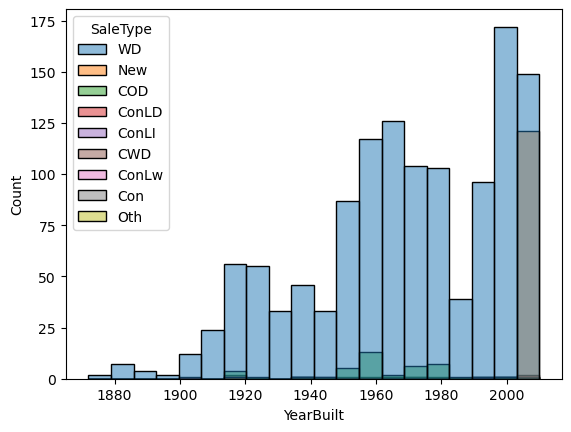

In [155]:
sns.histplot(x='YearBuilt', hue='SaleType', data=hdata, bins=20)
plt.show()

## As noticed, that data is left side skewed or negative skewed
## Sale Type 'Warranty Deed - Conventional' is higher in demand in every year
## 'Contract 15% Down payment regular terms' labeled as 2nd higher after year 2020

## Univariate analysis 

#### Identifies the type of dwelling involved in the sale.

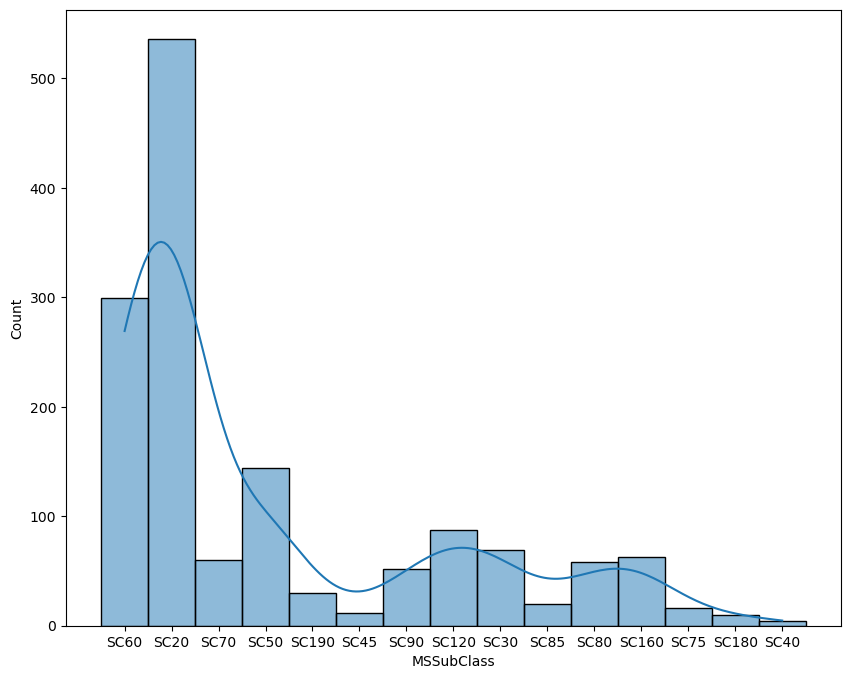

In [204]:
plt.figure(figsize=(10,8))
sns.histplot(x='MSSubClass', data=hdata, kde=True, bins=10)
plt.show()

## '1-STORY 1946 & NEWER ALL STYLES & 2-STORY 1946 & NEWER' type of dwelling involved in the sale
## data is right Side Skewed

#### Identifies the general zoning classification of the sale.

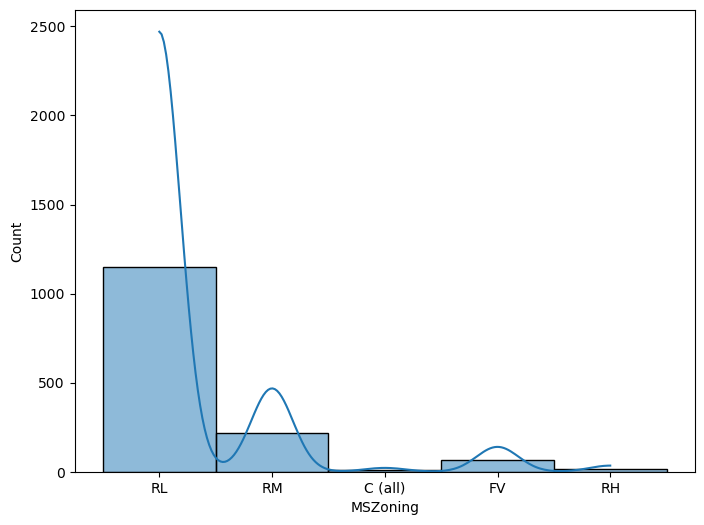

In [216]:
plt.figure(figsize=(8,6))
sns.histplot(x='MSZoning', data=hdata, kde=True, bins=20)
plt.show()

## 'Residential Low-Density' is high in sale
## Again Data is right side skewed

#### Type of road access to property

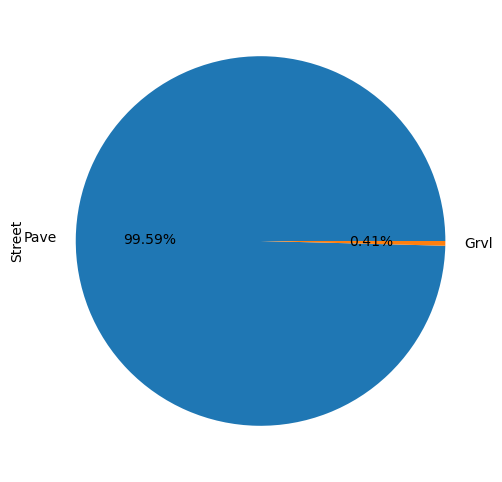

In [225]:
plt.figure(figsize=(8,6))
hdata['Street'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

## 99.59% Pave Type road type considered mostly for sale.
## There is strong relation of Street to sales.

#### General shape of property

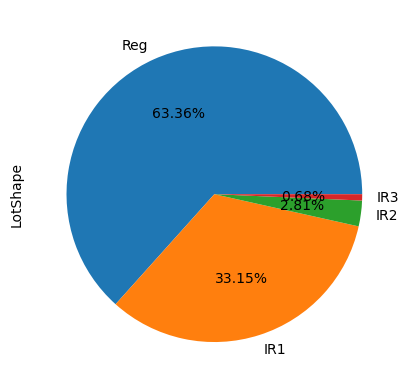

In [235]:
hdata['LotShape'].value_counts().plot(kind='pie', autopct="%1.2f%%")
plt.show()

## 63.36% flat sold with Regular Shape where 33.15% flat sold with 'Slightly irregular'

#### Flatness of the property

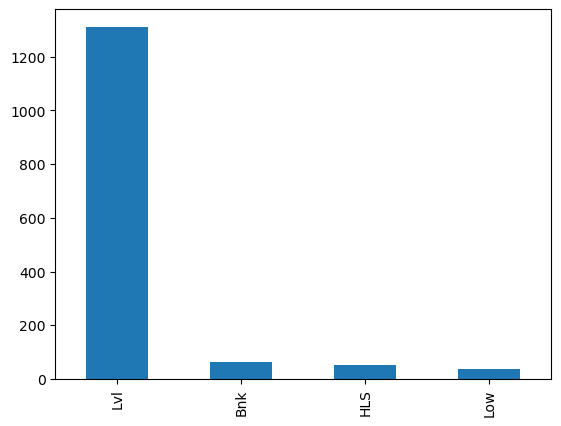

In [26]:
hdata['LandContour'].value_counts().plot(kind='bar')
plt.show()

## Near Flat/Level sold more than 1300 Flats

#### Type of utilities available

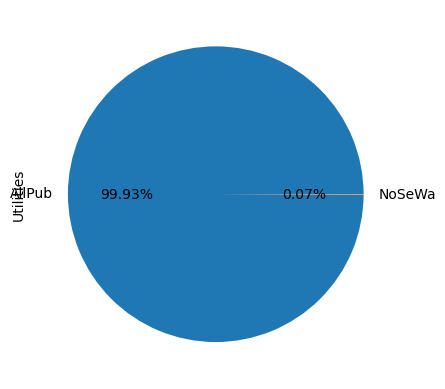

In [27]:
hdata['Utilities'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

## 99.93% flats sold with Utilities (E,G,W,& S) Electricity, Gas, Water and Septic Tank

#### Lot configuration

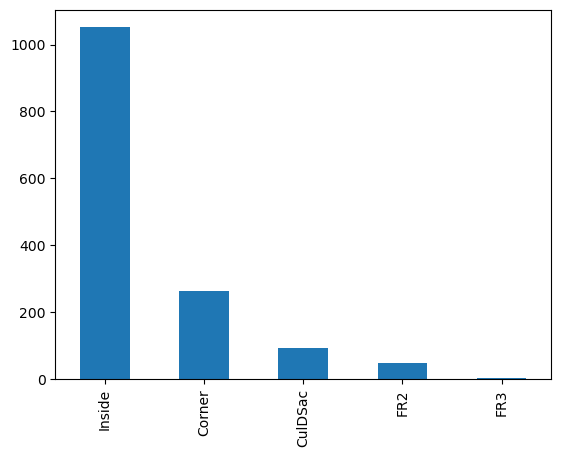

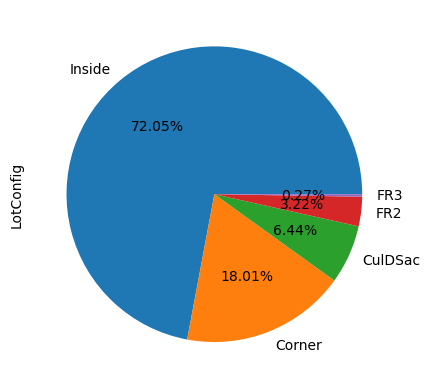

In [28]:
hdata['LotConfig'].value_counts().plot(kind='bar')
plt.show()
hdata['LotConfig'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()
## more than 1000 (72.05%) flat sold with Inside lot configuration

#### Slope of property

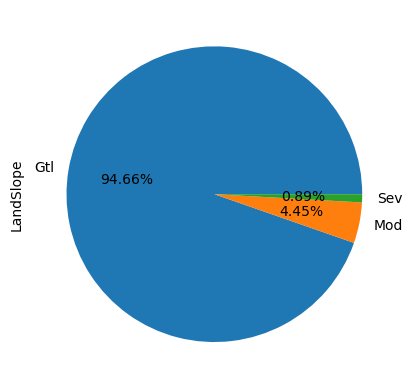

In [29]:
hdata['LandSlope'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()
## 04.66% flat sale with Gentle slope

#### Physical locations within Ames city limits

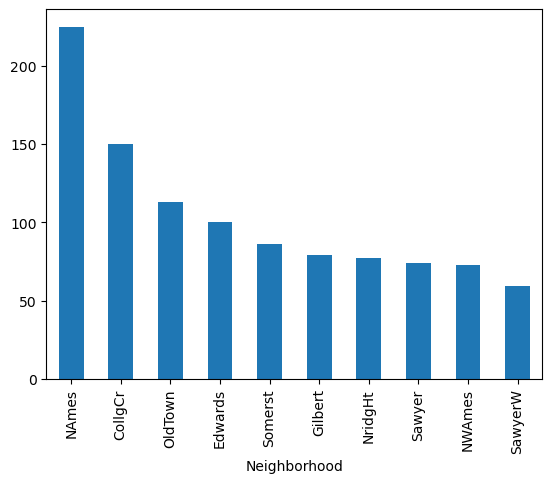

In [30]:
hdata['Neighborhood'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Neighborhood')
plt.show()
## Most Preferred location of Neighborhood is North Ames. Performed on top 10 Values.

#### Type of dwelling

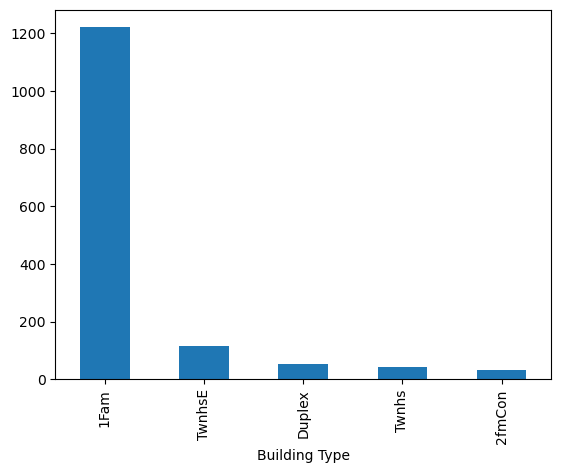

In [32]:
hdata['BldgType'].value_counts().plot(kind='bar')
plt.xlabel('Building Type')
plt.show()

## Single-family Detached flat sold more

#### Style of dwelling

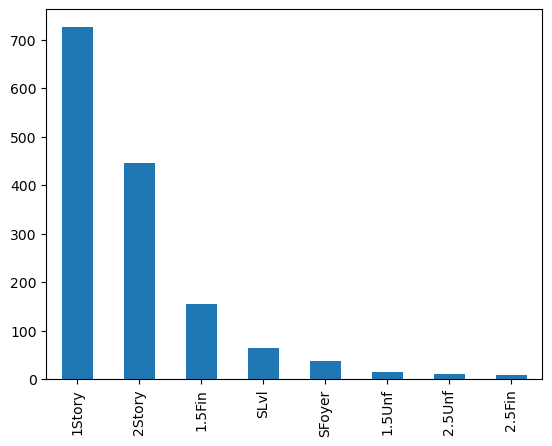

In [33]:
hdata['HouseStyle'].value_counts().plot(kind='bar')
plt.show()

## Most flats sale with Type One story and Two Story style dwelling

#### Type of roof

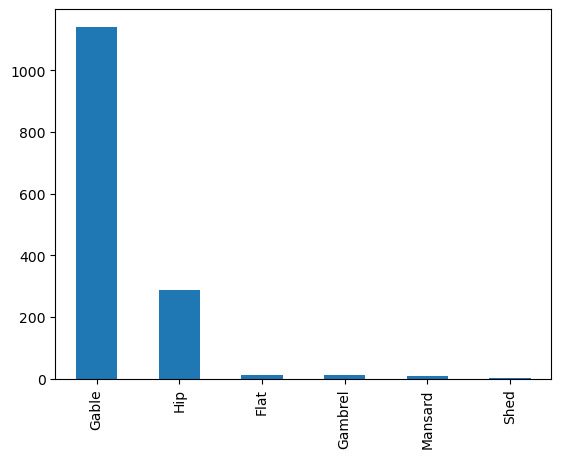

In [34]:
hdata['RoofStyle'].value_counts().plot(kind='bar')
plt.show()

## Most flats sale with Gable and Hip Roof type
## RoofStyle is a imbalance data set. More preferred roof type is Gable.

#### Roof material

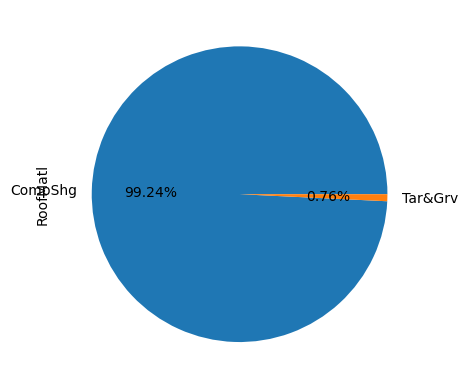

In [35]:
hdata['RoofMatl'].value_counts().head(2).plot(kind='pie', autopct='%1.2f%%')
plt.show()

## 99.23% flat sale built with Standard (Composite) Shingle Roof Material
## RoofMatl is a Imbalance Dataset 99.24$ Standard (Composite) Shingle mattle used

#### quality of the material on the exterior

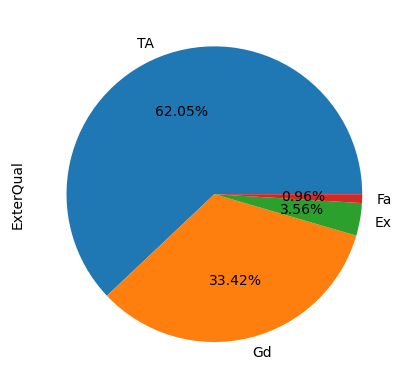

In [36]:
hdata['ExterQual'].value_counts().head(4).plot(kind='pie', autopct='%1.2f%%')
plt.show()

## 62.05% flat sold having the rating of Average/Typical quality of exterior materials
## ExterQual is highly correlated

#### Type of foundation

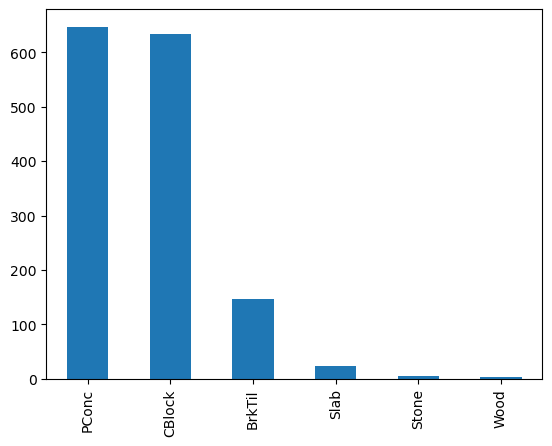

In [37]:
hdata['Foundation'].value_counts().head(10).plot(kind='bar')
plt.show()

## there are strong competition with Poured Contrete and Cinder Block foundation

#### Type of heating

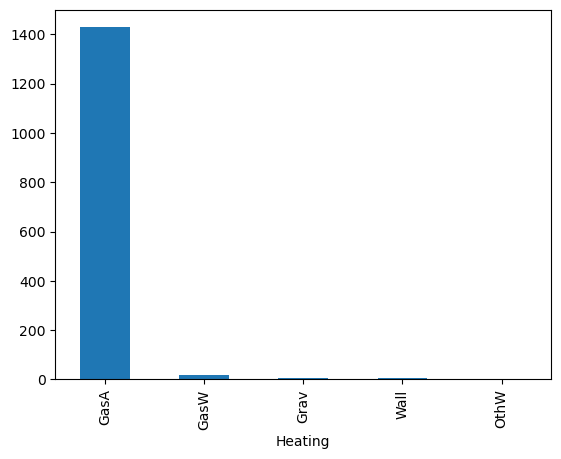

In [38]:
hdata['Heating'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Heating')
plt.show()

## 1400+ flat sold equipped with Gas forced warm air furnace

#### Electrical system

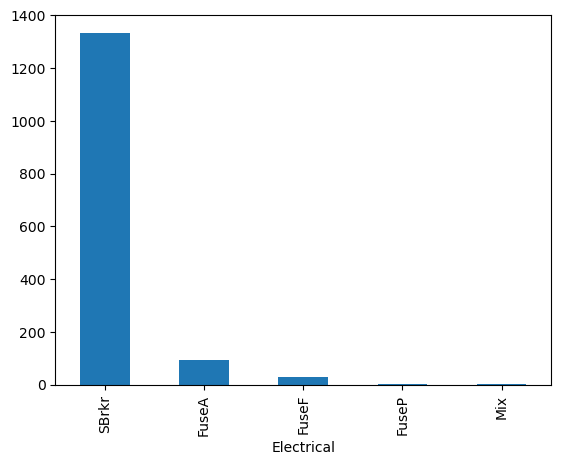

In [39]:
hdata['Electrical'].value_counts().plot(kind='bar')
plt.xlabel('Electrical')
plt.show()

## 1350 Apprx flats sold equipped with Standard Circuit Breakers & Romex.

#### Kitchen Quality

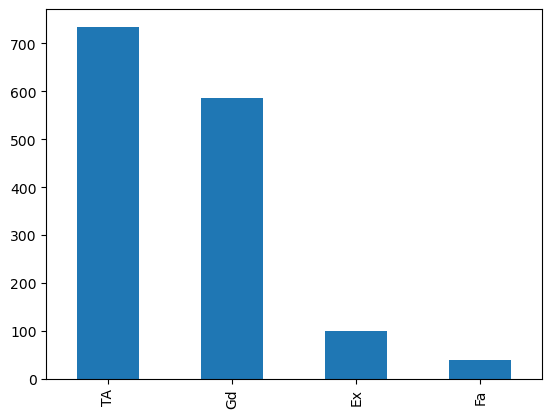

In [40]:
hdata['KitchenQual'].value_counts().plot(kind='bar')
plt.show()

## Flats sold with rating Typical/Average & Good Quality kitchen

#### Home functionality (Assume typical unless deductions are warranted)

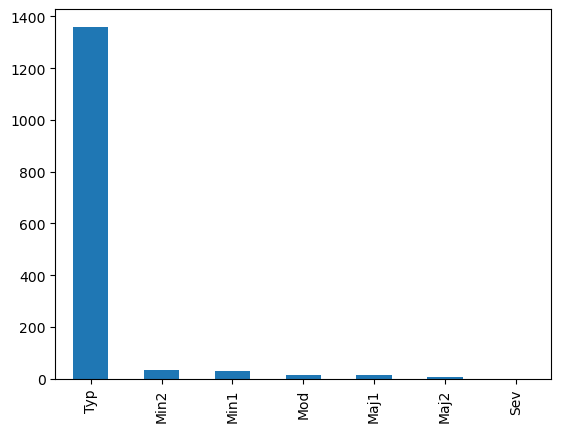

In [41]:
hdata['Functional'].value_counts().plot(kind='bar')
plt.show()

## approx 1300+ Flats sold with Typical Functionality

#### Garage location

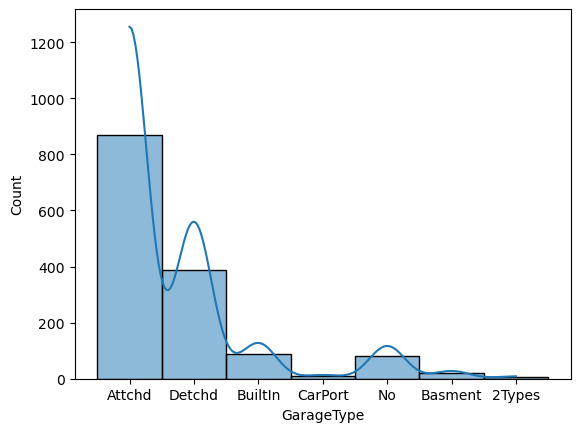

In [231]:
sns.histplot(hdata['GarageType'], kde=True)
#hdata['GarageType'].value_counts().plot(kind='bar')
plt.show()

## approx 900 Flats sold with Garage Attached to the home
## Data is highly correlated

#### Interior finish of the garage

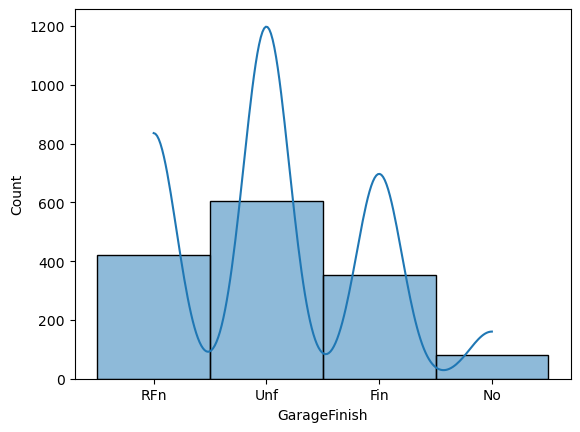

In [229]:
sns.histplot(hdata['GarageFinish'], kde=True)
#hdata['GarageFinish'].value_counts().plot(kind='bar')
plt.show()

## approx 600 Flats sold with unfinished garage interiors
## Data is highly correlated and balanced data

#### Paved driveway

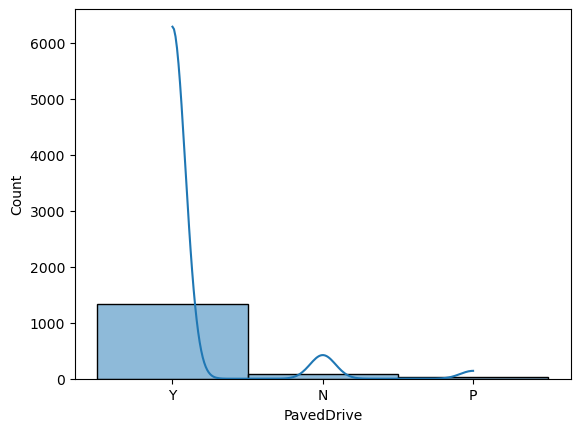

In [223]:
sns.histplot(hdata['PavedDrive'], kde=True)

#hdata['PavedDrive'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

## approx 91.78% flats sold with Paved driveway
## Dataset is skewed

#### Pool quality

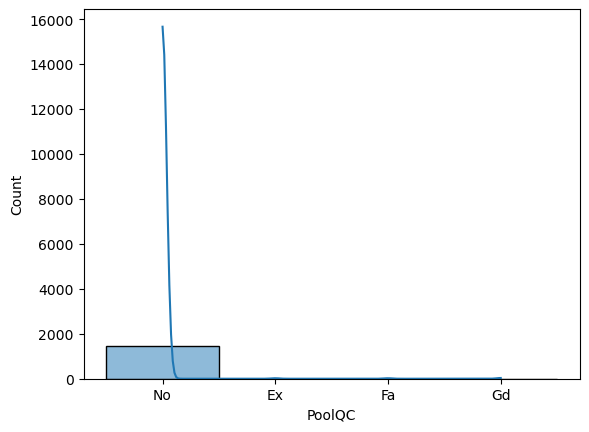

In [221]:
sns.histplot(hdata['PoolQC'], kde=True)
#hdata['PoolQC'].value_counts().plot(kind='bar')
plt.show()

## appr 1500 flats sold without considering Pool
## Imbalanced Dataset

#### Fence Quality

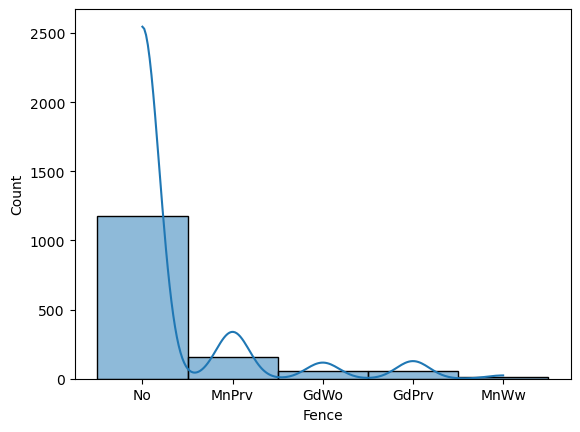

In [220]:
sns.histplot(hdata['Fence'], kde=True)
#hdata['Fence'].value_counts().plot(kind='bar')
plt.show()

## approx 1190 flats sold without Fence
## Right Side Skewness and Imbalanced Dataset

#### Miscellaneous feature not covered in other categories

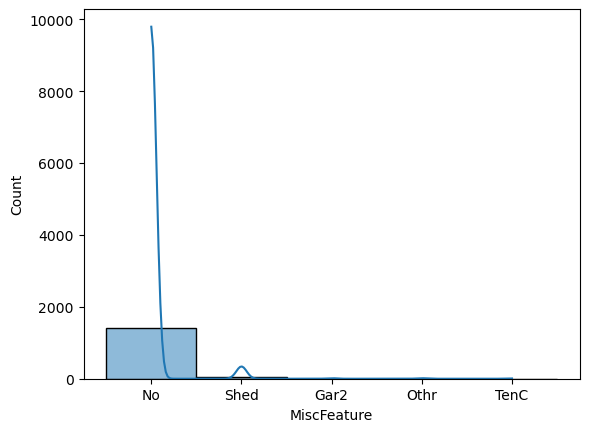

In [218]:
sns.histplot(hdata['MiscFeature'], kde=True)
#hdata['MiscFeature'].value_counts().plot(kind='kde')
plt.show()

## approx 1400 flats sold without misc categories features
## Almost useless dataset because data is imbalanced

#### Month Sold (MM)

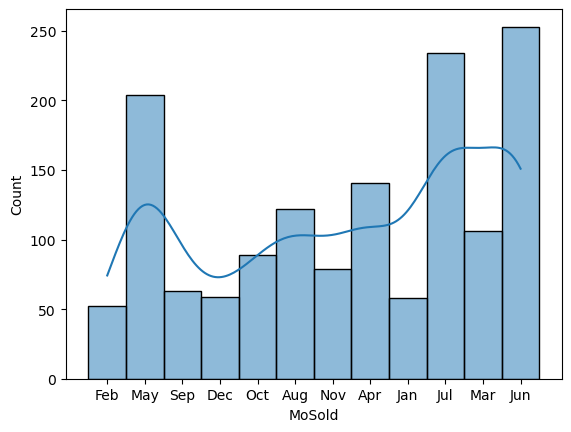

In [196]:
sns.histplot(hdata['MoSold'], kde=True)
plt.show()

## Most Flat solds in the Year Jun, July and May.
## Balanced Dataset and seem normal distributed

#### Type of sale

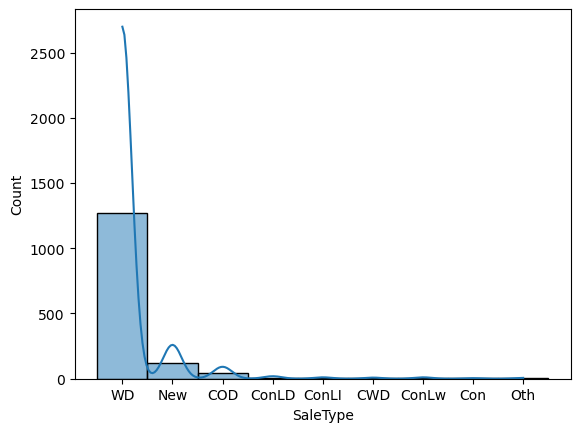

In [208]:
sns.histplot(hdata['SaleType'], kde=True)
plt.show()

## Most Flat solds with Warranty Deed - Conventional
## Imbalanced Dataset
## Right Side Skewness in the dataset

#### Condition of sale

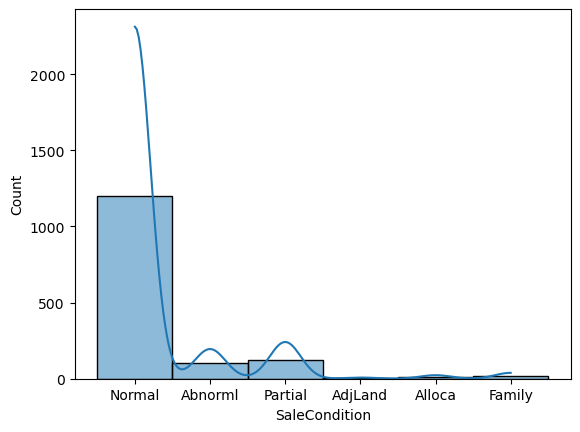

In [201]:
sns.histplot(hdata['SaleCondition'], kde=True)
#hdata['SaleCondition'].value_counts().plot(kind='bar')
plt.show()

## Most Flat solds considering Normal Sale
## Imbalanced Dataset
## Right Side Skewness in the dataset

# Multivariate Analysis

### Numerical - Numerical Analysis

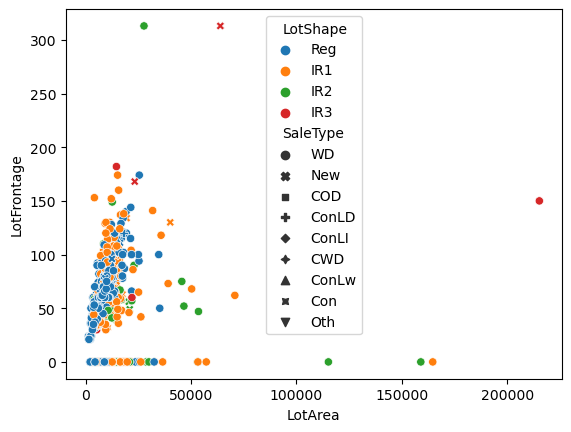

In [51]:
sns.scatterplot(x='LotArea', y='LotFrontage', data=hdata, hue='LotShape', style='SaleType')
plt.show()

## Seen, there are huge customer less than 50000 lot size area customers under 200 feet of connected street 

### Numerical vs Numerical Analysis

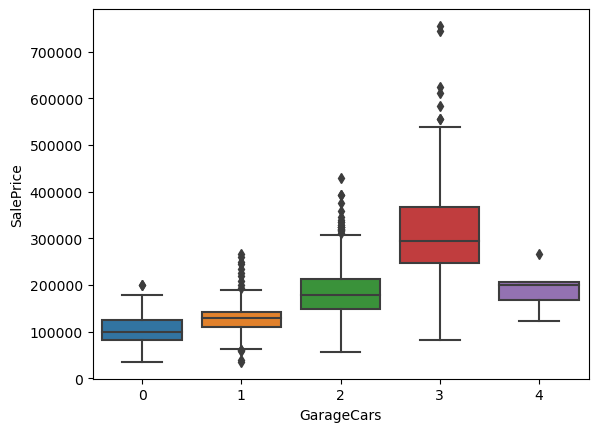

In [15]:
sns.boxplot(x='GarageCars', y='SalePrice', data=hdata)
plt.show()

## Data is left skewed
## Sold flat with max 3 car capacity garage
## There is Outliers in Flats with 0,1,2,4 Car Garage Capacity, but there is potential outliers in 3 Garage Car Flats
## There is strong correlation between GarageCars and SalePrice

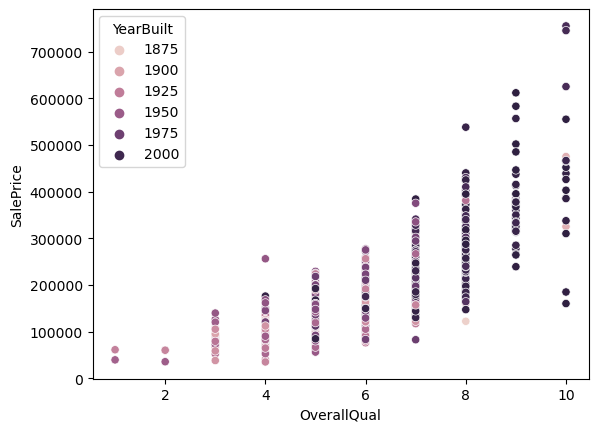

In [27]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=hdata, hue='YearBuilt')
plt.show()

## Positive and strong relation between OverallQuality and Sale Price according to built Year
## There is a potential outliers OverallQuality Rating 10 but sale price is more than 7 lakhs.

### Category vs Category Analysis

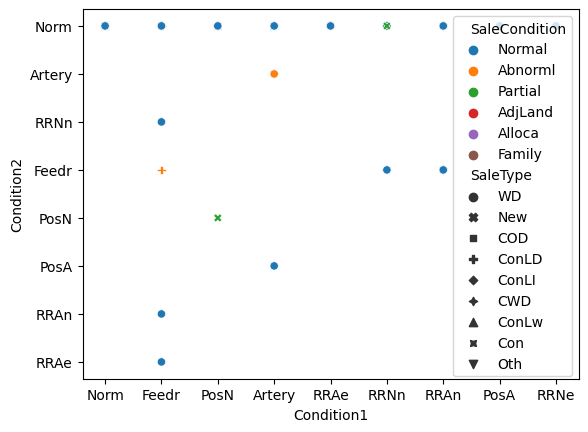

In [68]:
sns.scatterplot(x='Condition1', y='Condition2', data=hdata, hue='SaleCondition', style="SaleType")
plt.show()

## Normal proximity is related to All other various conditions

### Categorical vs Numerical

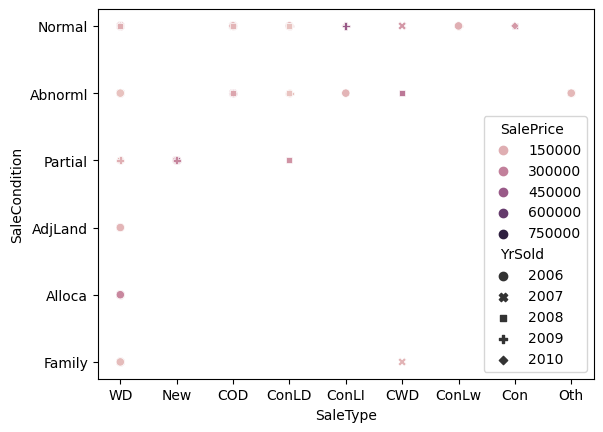

In [78]:
sns.scatterplot(x='SaleType', y='SaleCondition', data=hdata, hue='SalePrice', style='YrSold')
plt.show()

## Normal Conditional Flats price 1.5 lakh

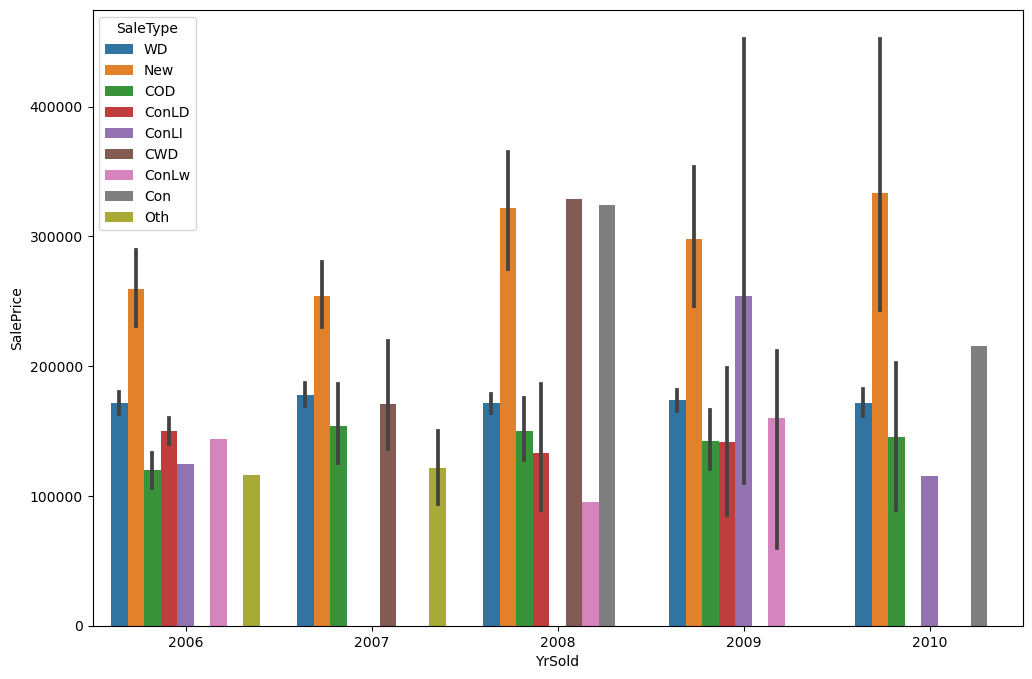

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x='YrSold', y='SalePrice', data=hdata, hue='SaleType')
plt.show()

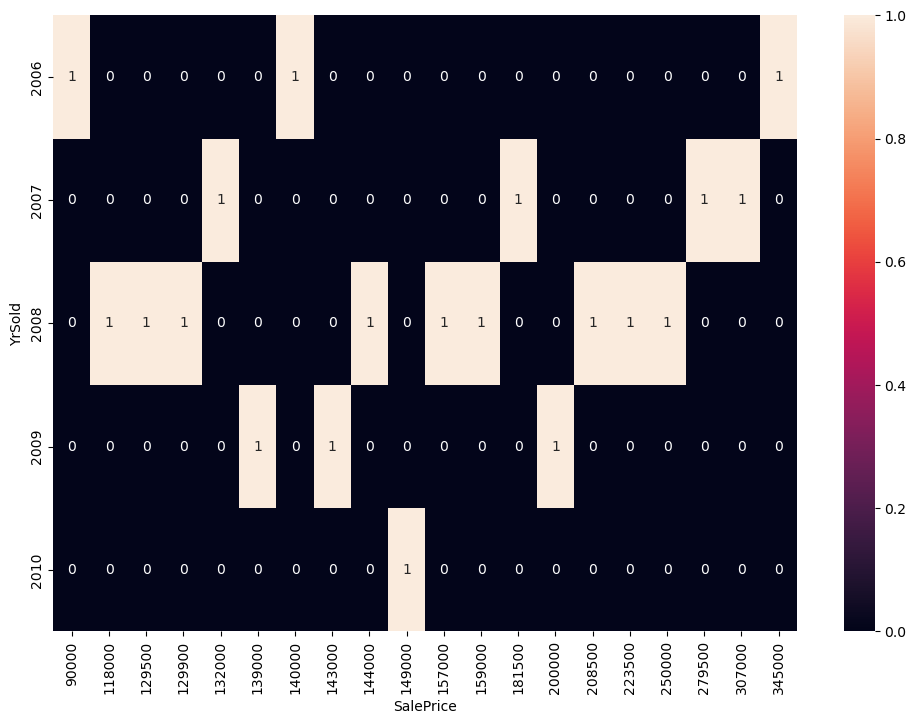

SalePrice,90000,118000,129500,129900,132000,139000,140000,143000,144000,149000,157000,159000,181500,200000,208500,223500,250000,279500,307000,345000
YrSold,,,,,,,,,,,,,,,,,,,,
2006,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2008,0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0
2009,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(hdata['YrSold'],hdata['SalePrice'].head(20)), annot=True)
plt.show()

### Correlation Representation in Plots

In [116]:
sp = pd.DataFrame(hdata.corr()['SalePrice'])

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_47127/1604827744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp = pd.DataFrame(hdata.corr()['SalePrice'])


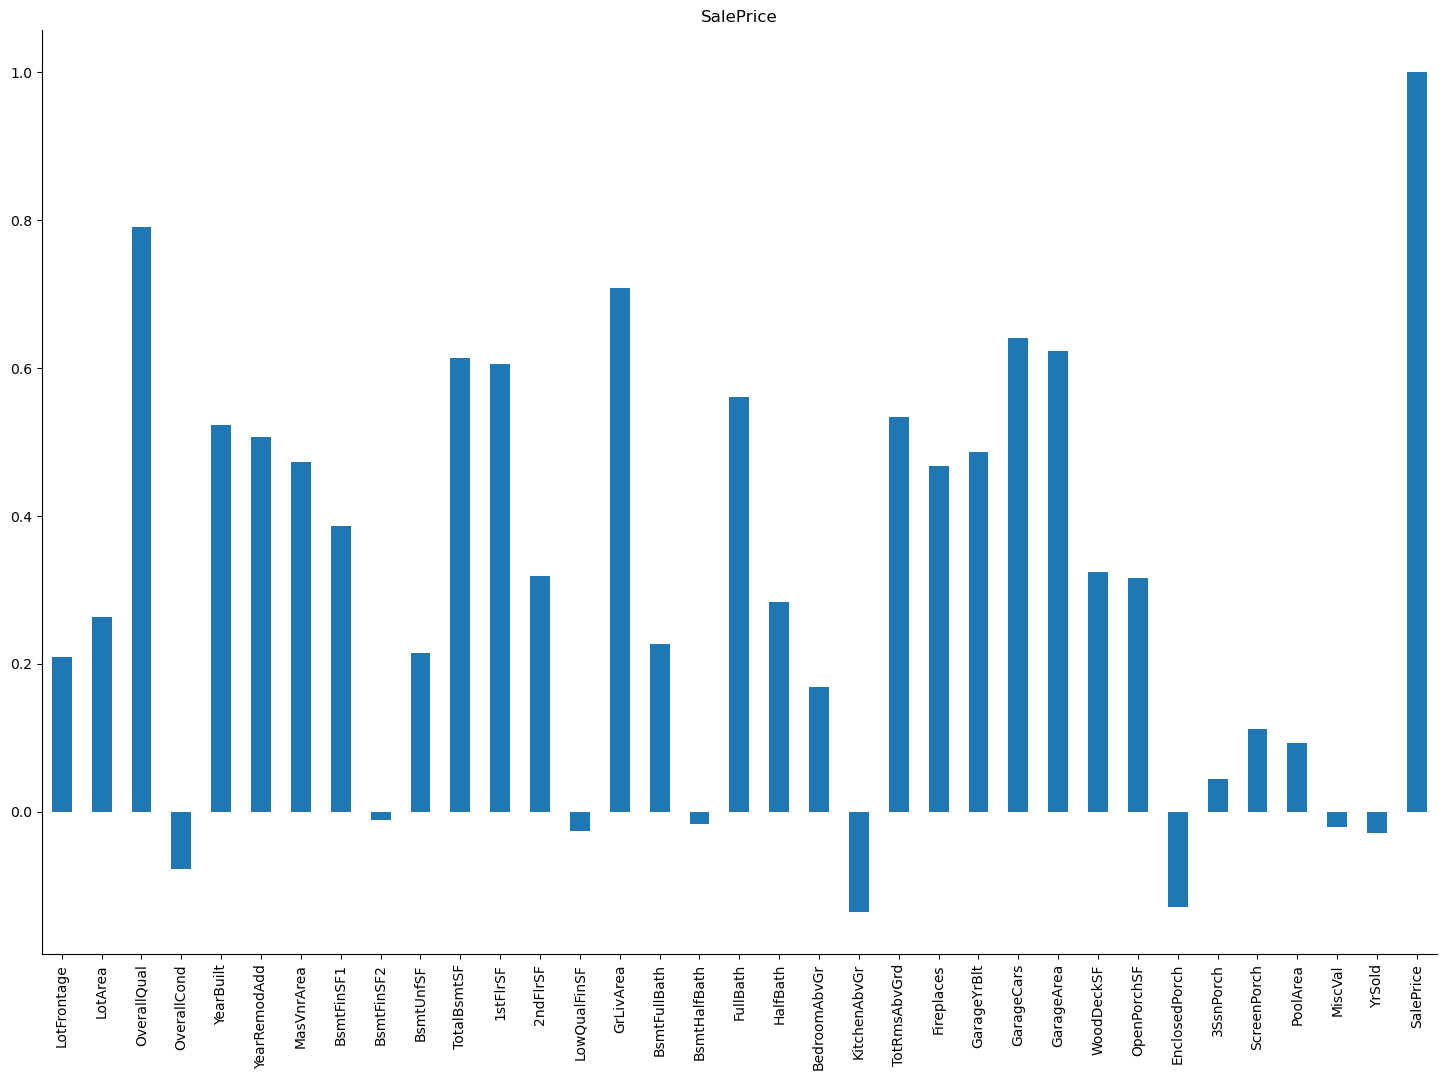

In [127]:
plt.figure(figsize=(18,12))
sp['SalePrice'].plot(kind='bar', title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [128]:
## SalePrice is negative correlated with OverallCondition, LowQualFinSF, KitchenAbvGr and EnclosedPorsch
## SalePrice is highly correlated with OverallQual and GrLivArea

In [29]:
LTF = pd.DataFrame(hdata.corr()['LotFrontage'])

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/2449523157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  LTF = pd.DataFrame(hdata.corr()['LotFrontage'])


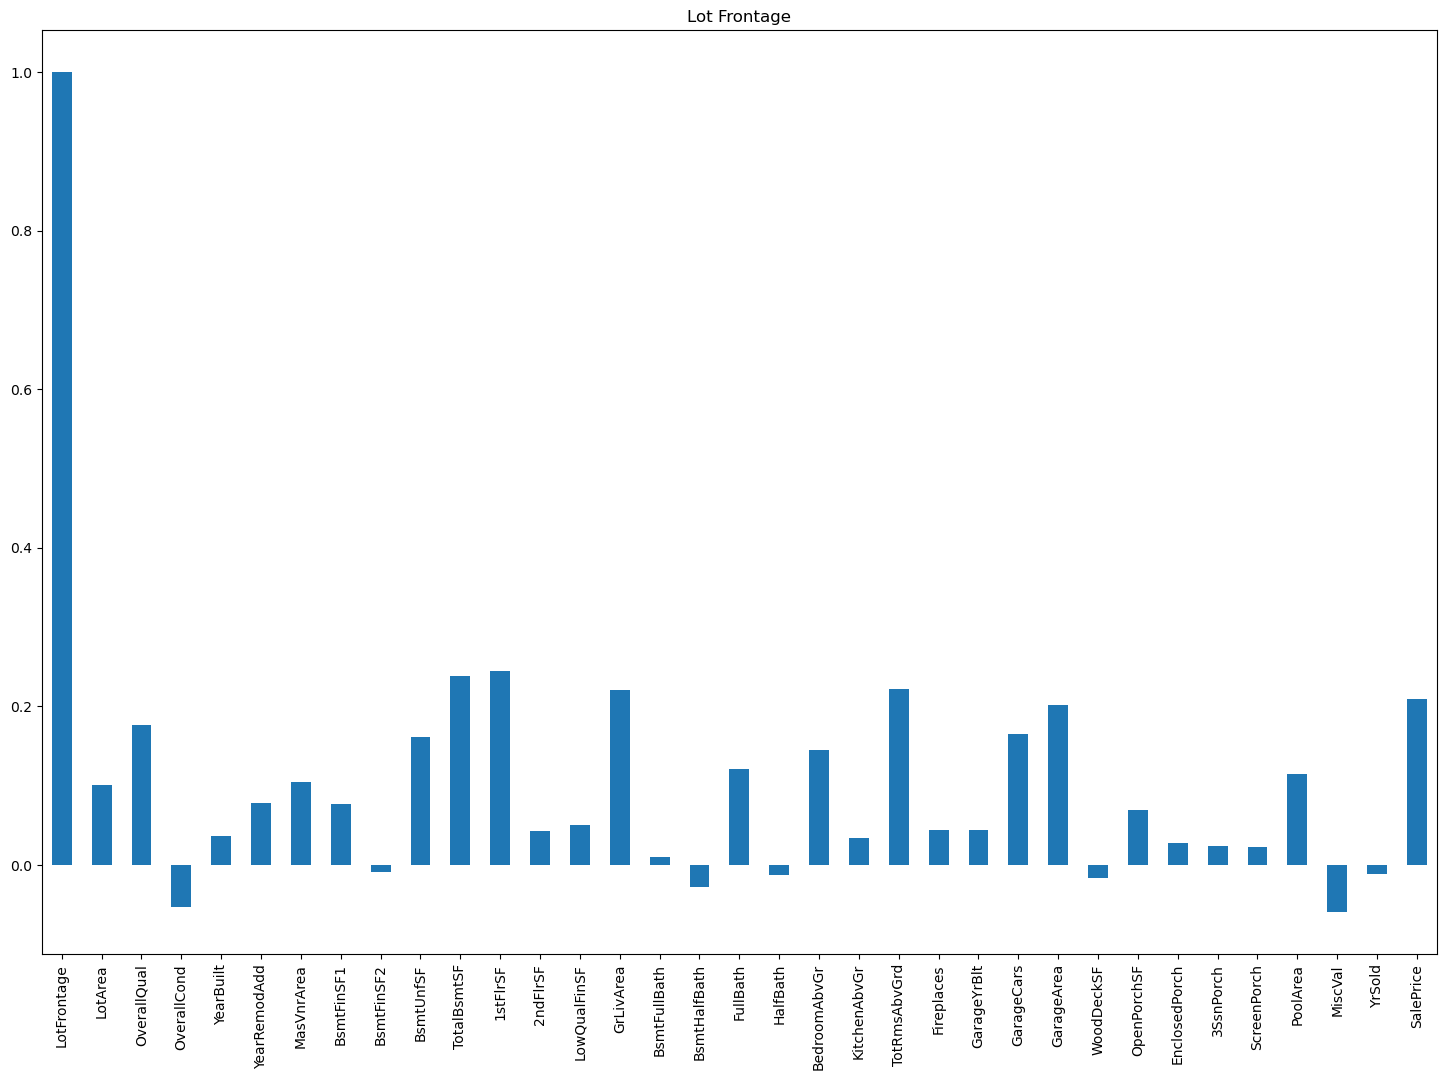

In [51]:
plt.figure(figsize=(18,12))
LTF['LotFrontage'].plot(kind='bar', title='Lot Frontage')
plt.show()

In [ ]:
## LotFrontAge is negative correlated with 'OverallCond' and 'MiscVal'
## Good Correlated with '1stFlrSF' and TotalBsmtSF

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/85313689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lta = pd.DataFrame(hdata.corr()['LotArea'])


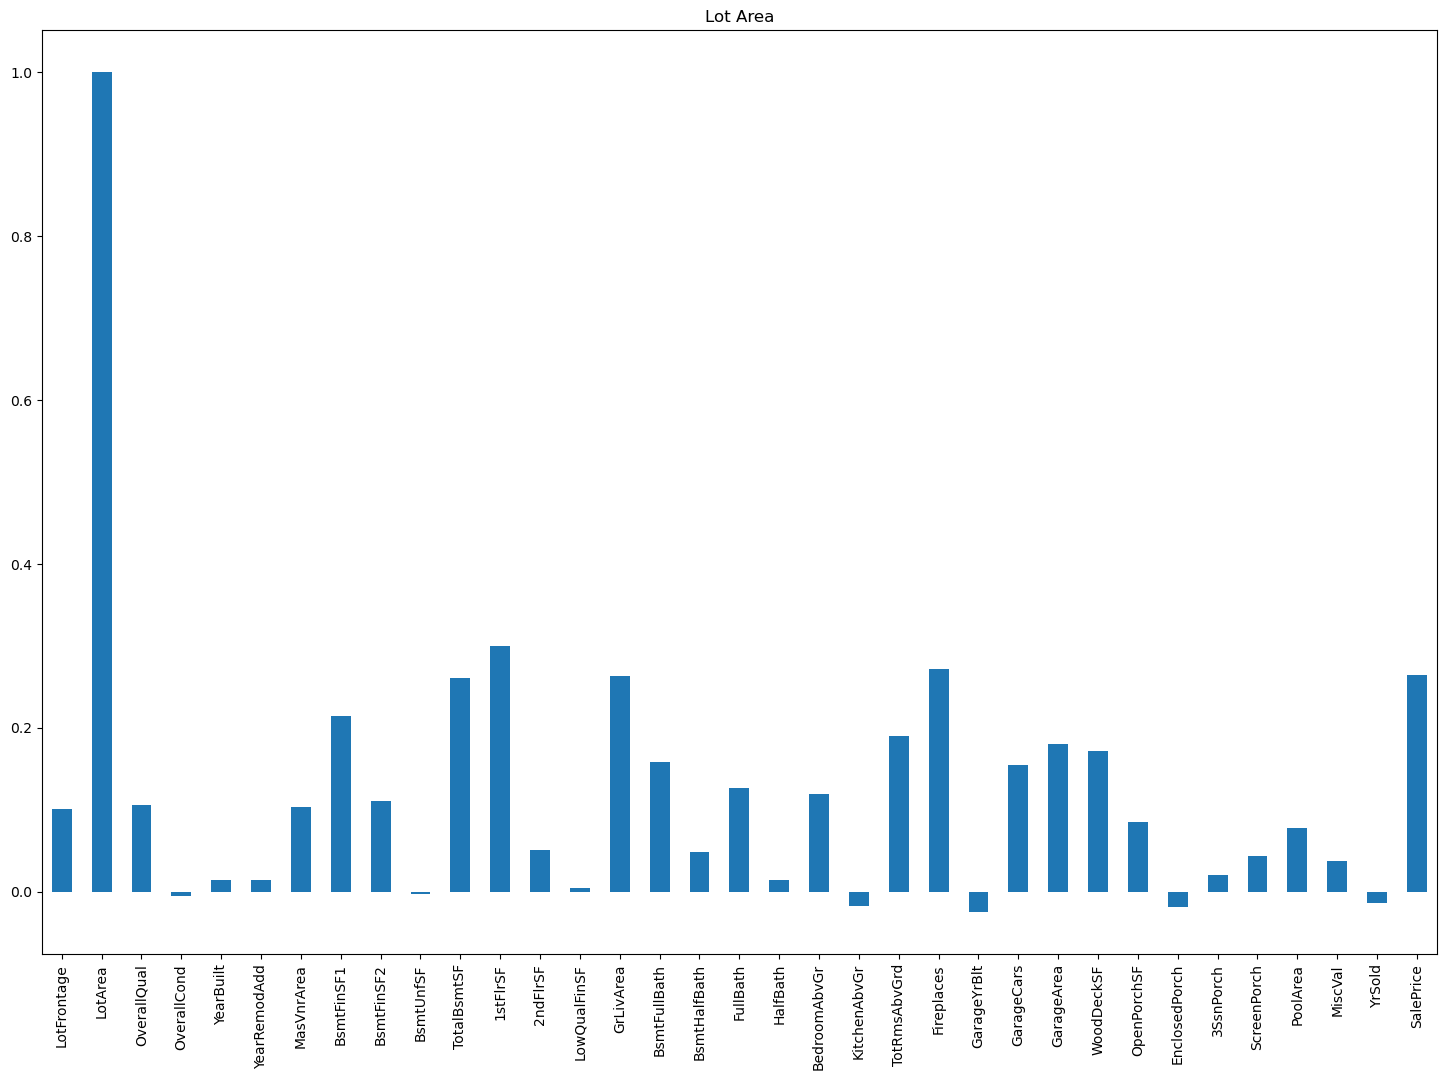

In [50]:
lta = pd.DataFrame(hdata.corr()['LotArea'])
plt.figure(figsize=(18,12))
lta['LotArea'].plot(kind='bar', title='Lot Area')
plt.show()

In [ ]:
## LotArea has a Good correlation with 'SalePrice', '1stFlrSF', 'GrLivArea' and 'Fireplaces'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/1047597844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ybt = pd.DataFrame(hdata.corr()['YearBuilt'])


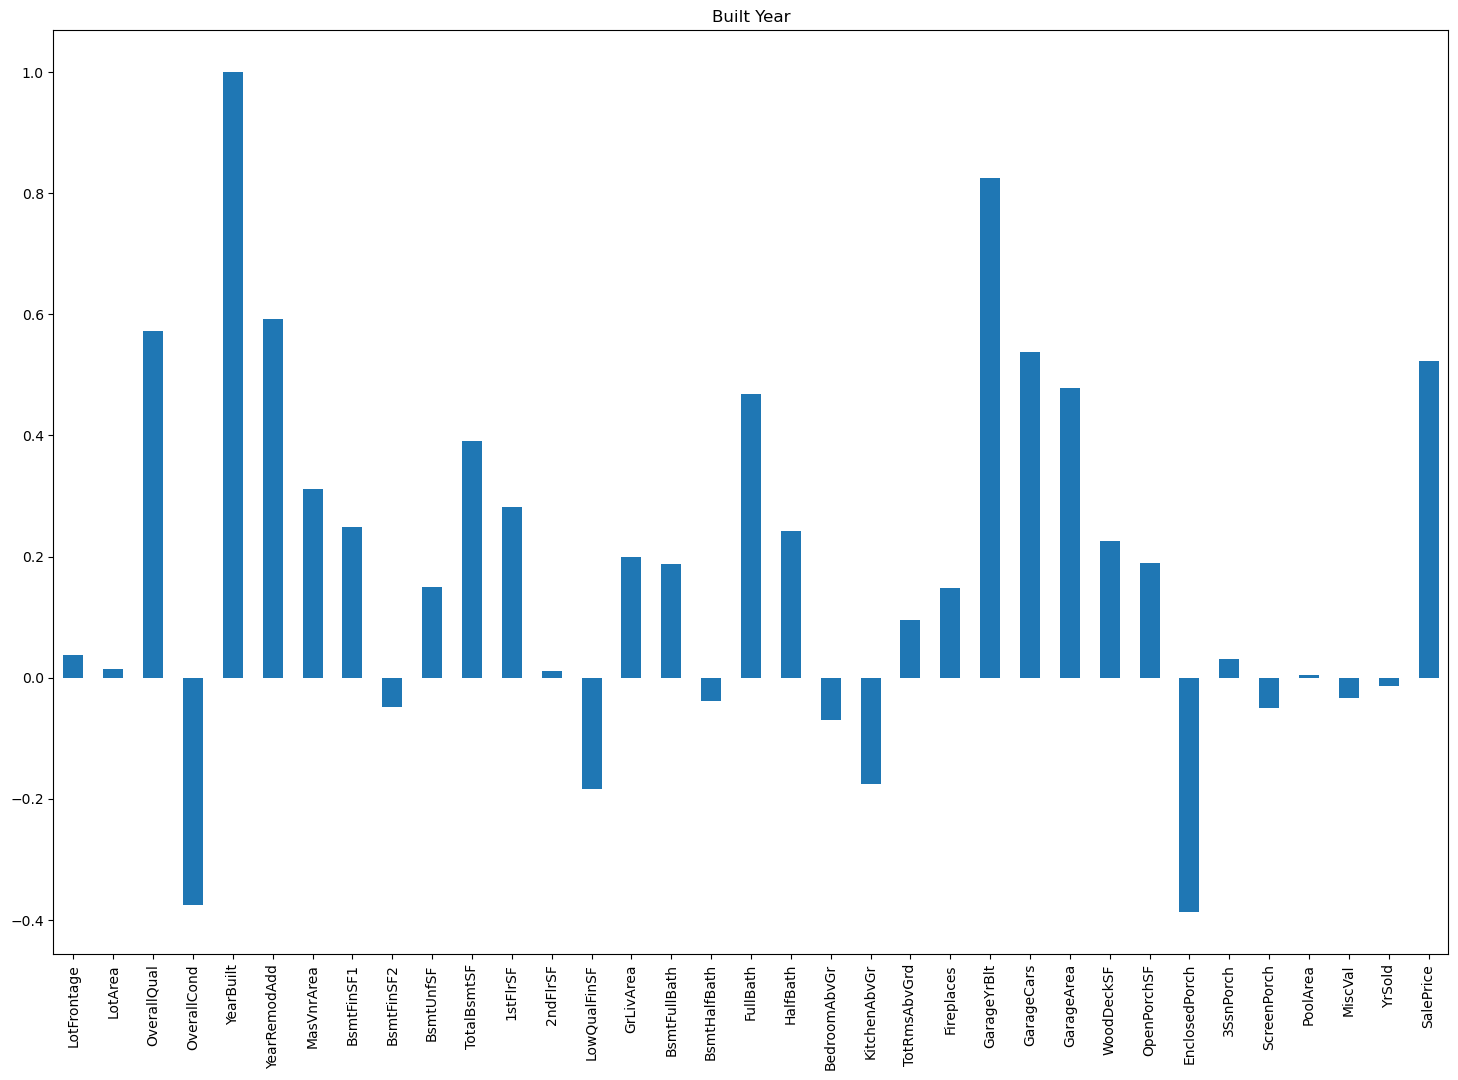

In [49]:
ybt = pd.DataFrame(hdata.corr()['YearBuilt'])
plt.figure(figsize=(18,12))
ybt['YearBuilt'].plot(kind='bar', title='Built Year')
plt.show()

In [ ]:
## YearBuilt High Negative Correlation with 'OverallCond' and 'EnclosedPorch'
## And Strong Correlationship with 'GarageYrBlt' and 'SalePrice' 

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/1538628054.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mva = pd.DataFrame(hdata.corr()['MasVnrArea'])


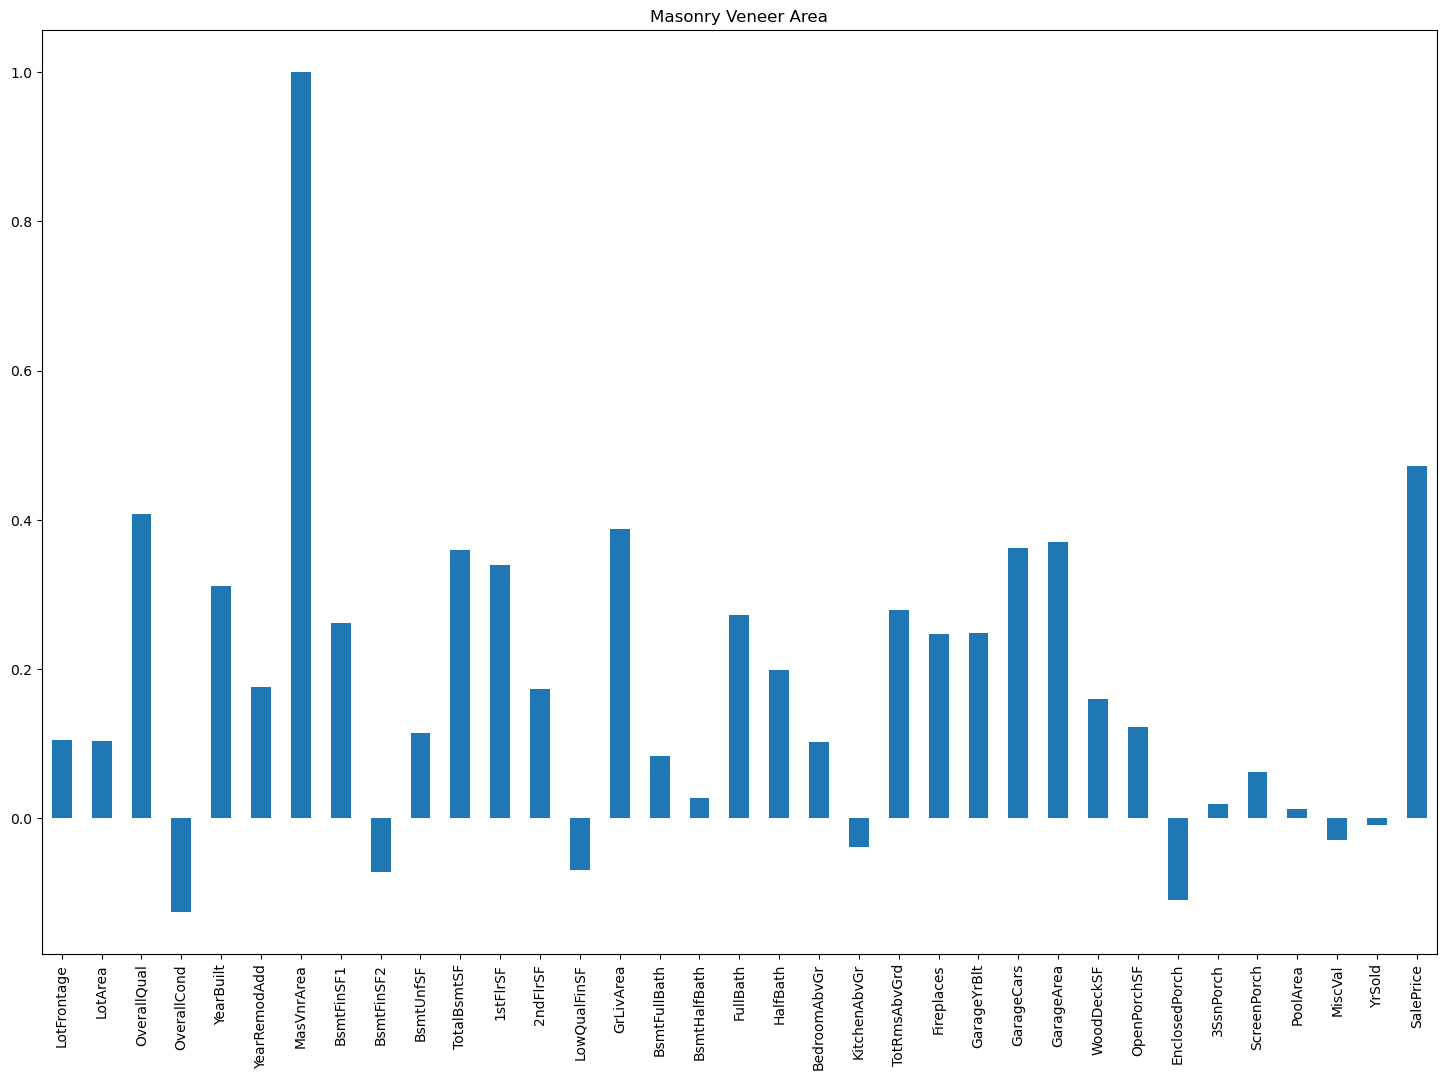

In [48]:
mva = pd.DataFrame(hdata.corr()['MasVnrArea'])
plt.figure(figsize=(18,12))
mva['MasVnrArea'].plot(kind='bar', title='Masonry Veneer Area')
plt.show()

In [ ]:
## Masonry veneer area has a Good Correlation with 'SalePrice'
## And has Negative Correlation with few datasets 'OverallCond' & 'EnclosedPorch'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/4270837330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bfsf = pd.DataFrame(hdata.corr()['BsmtFinSF1'])


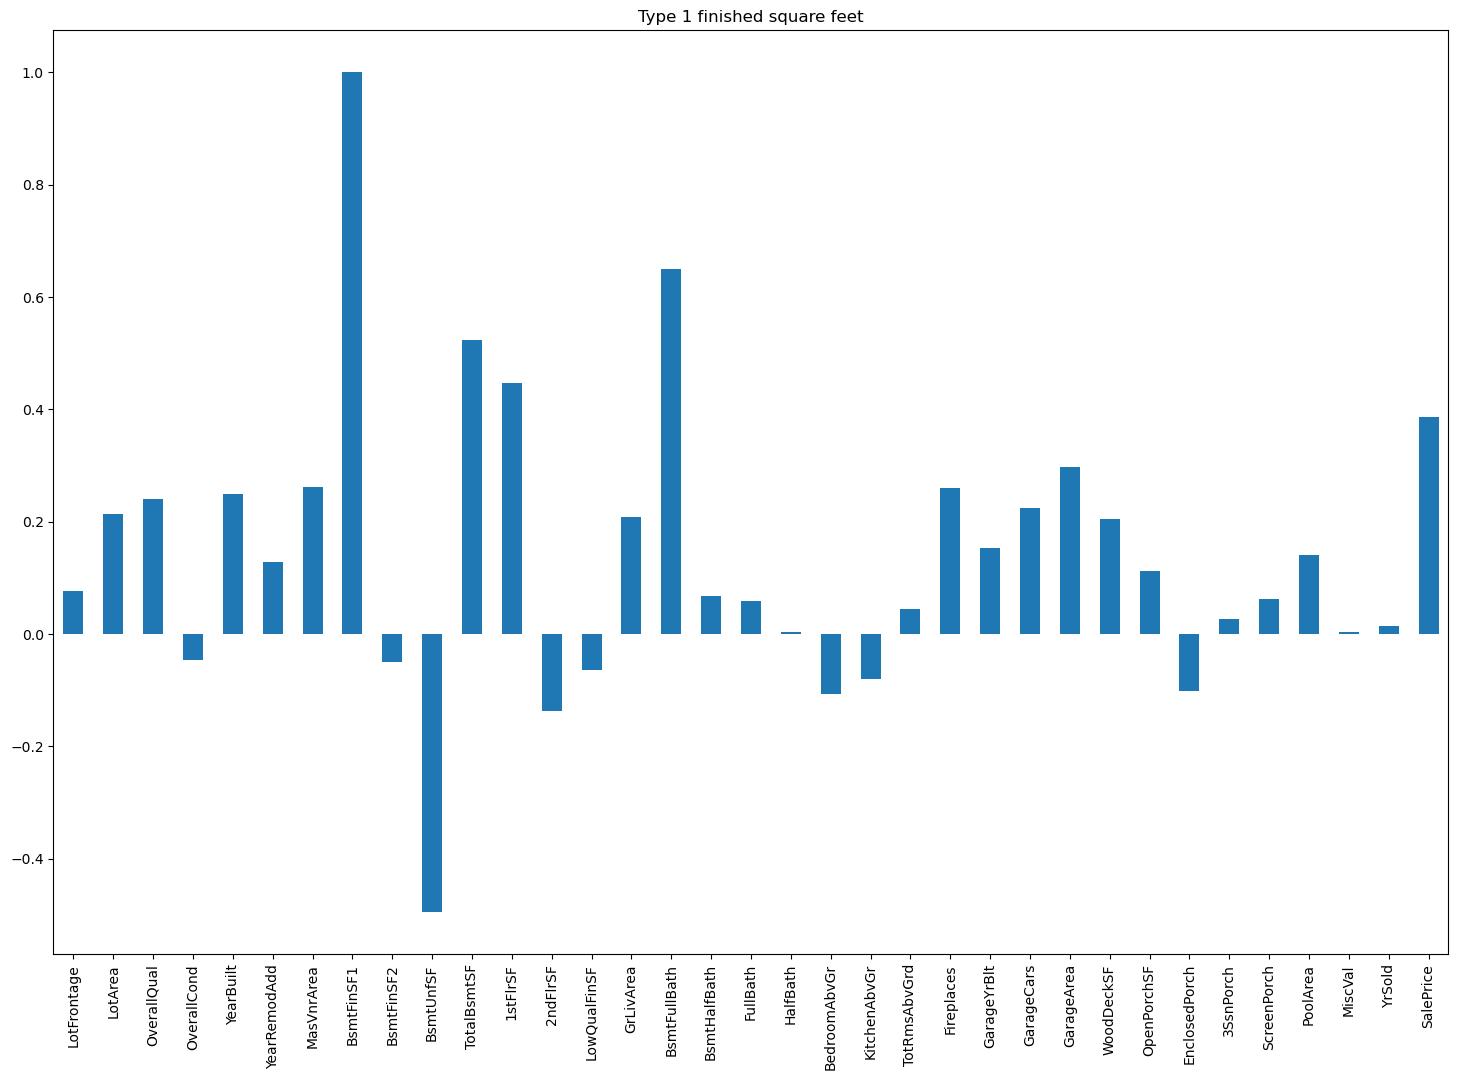

In [47]:
bfsf = pd.DataFrame(hdata.corr()['BsmtFinSF1'])
plt.figure(figsize=(18,12))
bfsf['BsmtFinSF1'].plot(kind='bar', title='Type 1 finished square feet')
plt.show()

In [ ]:
## Masonry veneer area has a Good Correlation with 'BsmtHalfBath' and 'SalePrice'
## And strong negative correlation with 'BsmtUnfSF'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/2336507347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tbs = pd.DataFrame(hdata.corr()['TotalBsmtSF'])


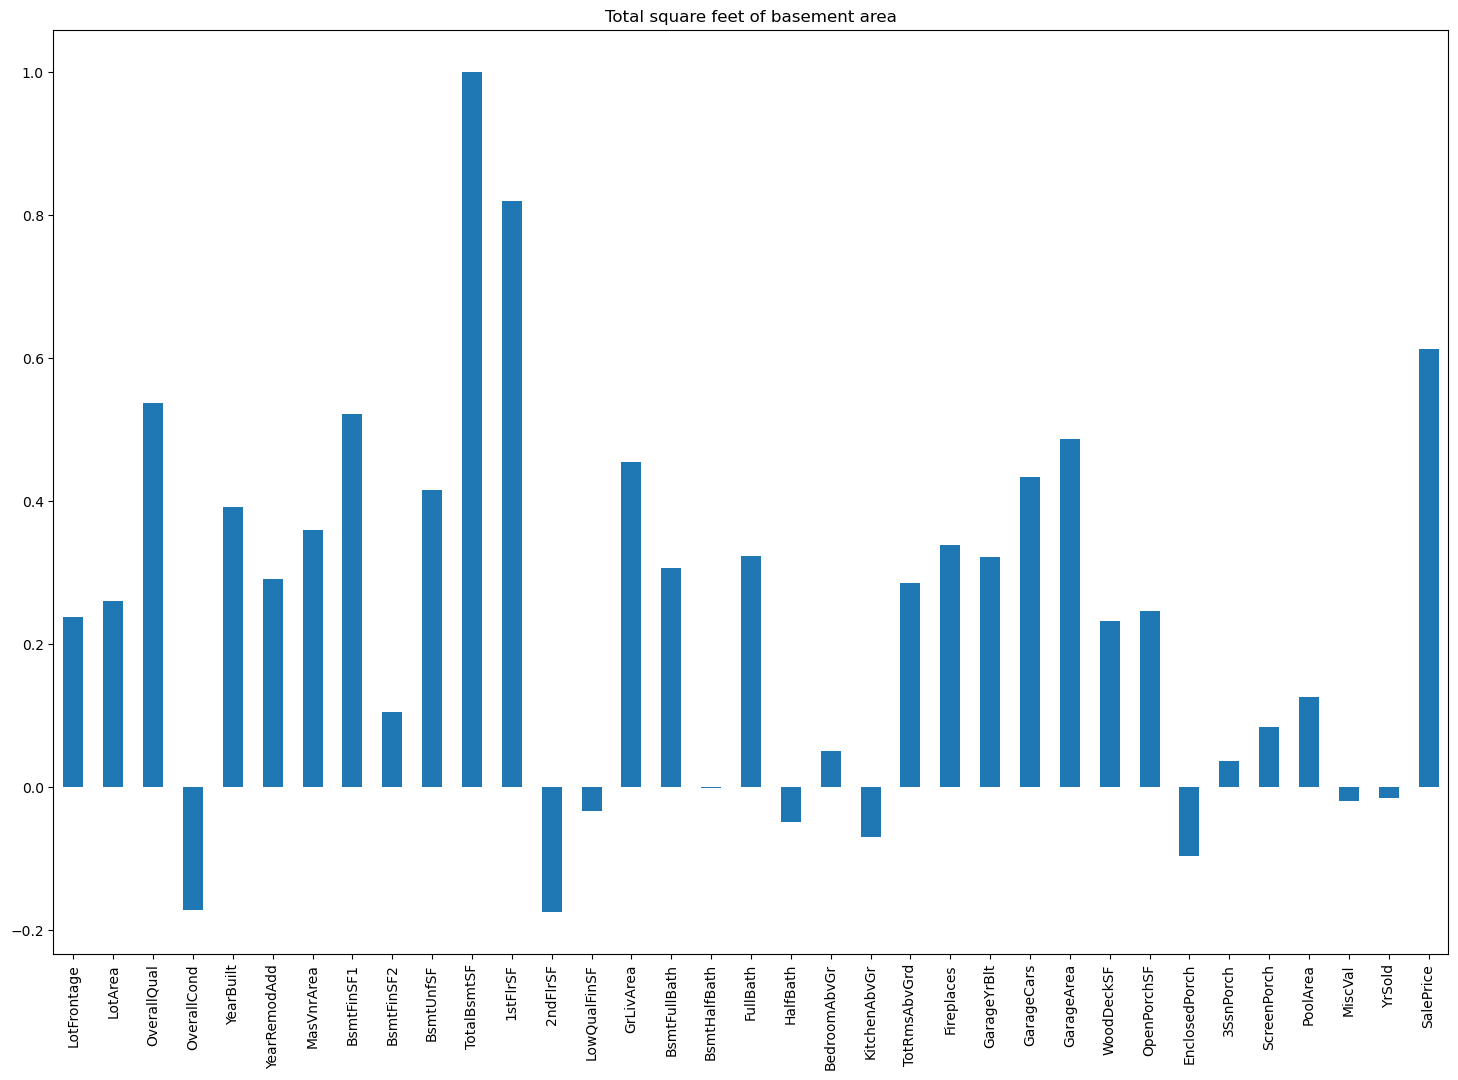

In [46]:
tbs = pd.DataFrame(hdata.corr()['TotalBsmtSF'])
plt.figure(figsize=(18,12))
tbs['TotalBsmtSF'].plot(kind='bar', title='Total square feet of basement area')
plt.show()

In [ ]:
## TotalBsmtSF has a Strong Correlation with '1stFlrSF' and 'SalePrice'
## And has a negative correlation with 'OverallCond' and '2ndFlrSF'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/3627472512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gla = pd.DataFrame(hdata.corr()['GrLivArea'])


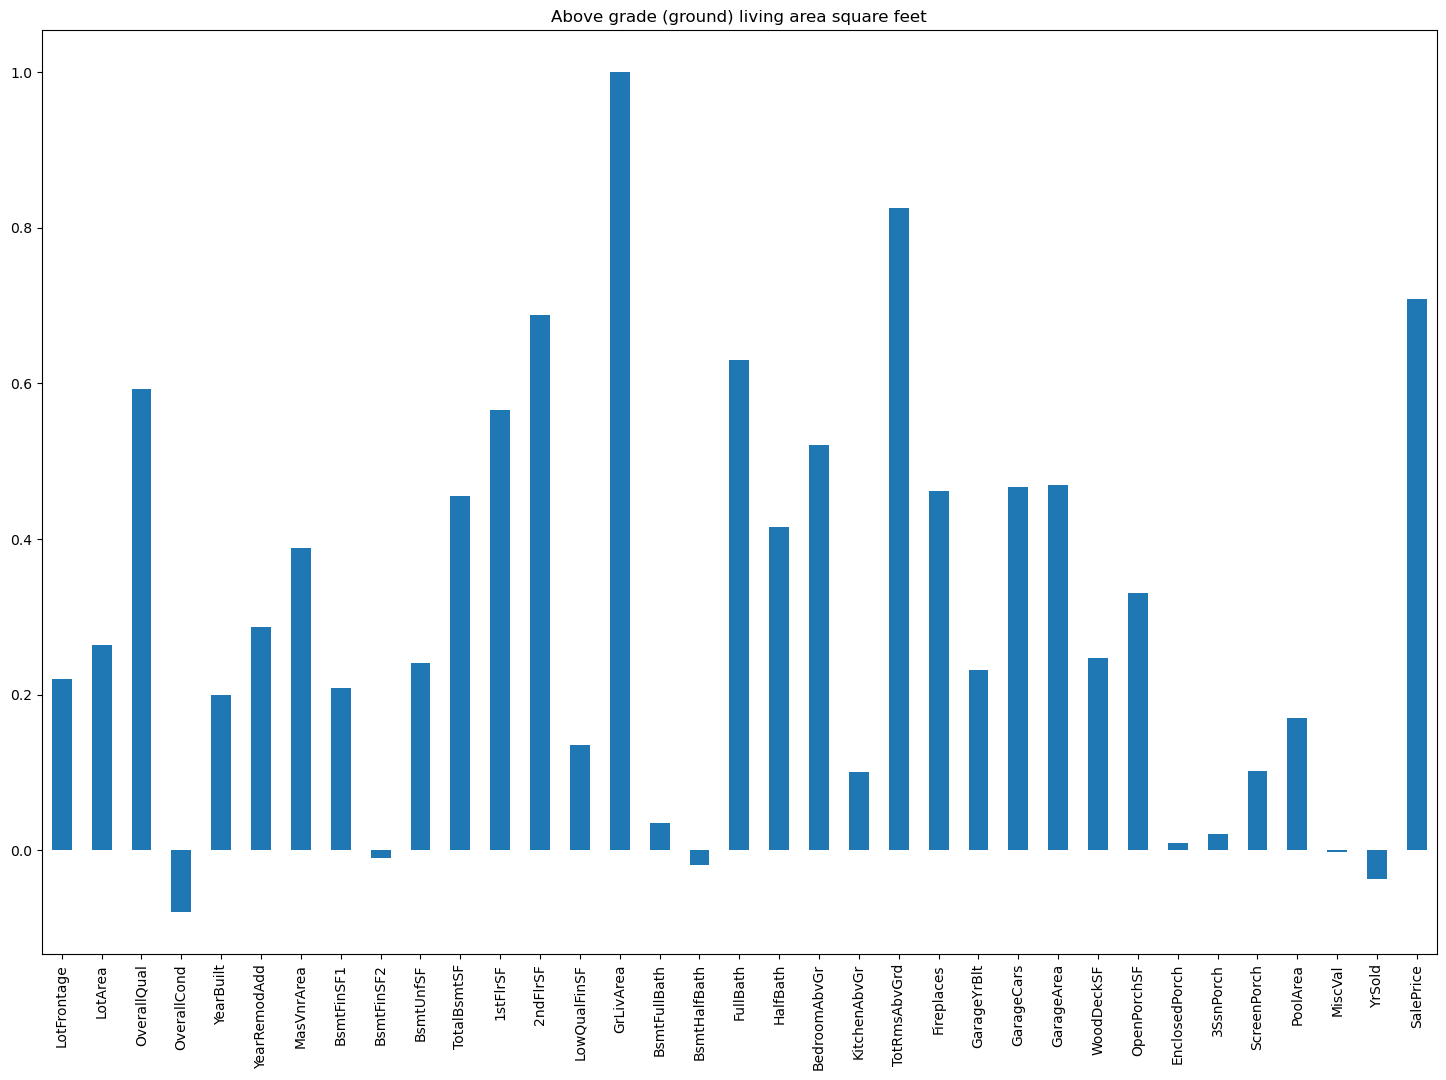

In [45]:
gla = pd.DataFrame(hdata.corr()['GrLivArea'])
plt.figure(figsize=(18,12))
gla['GrLivArea'].plot(kind='bar', title='Above grade (ground) living area square feet')
plt.show()

In [ ]:
## 'Above grade (ground) living area' has a Strong Correlation with 'OverallQual', '2ndFlrSF', 'TotalRmsAbsGrnd' and 'SalePrice'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/3688141383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ga = pd.DataFrame(hdata.corr()['GarageArea'])


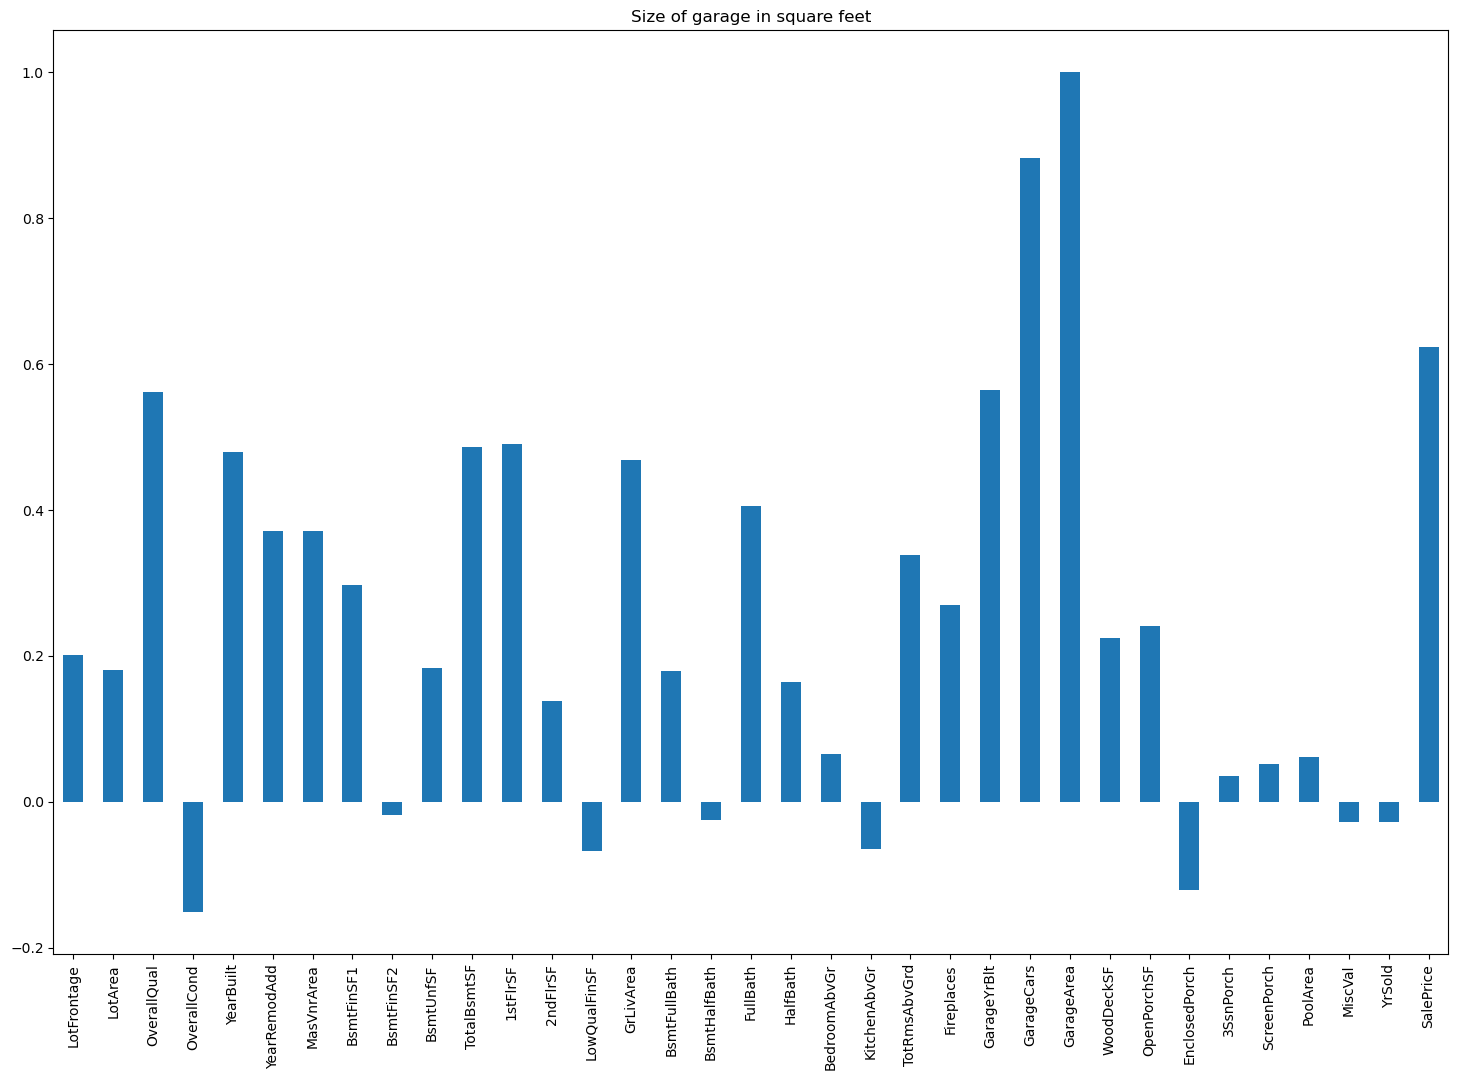

In [42]:
ga = pd.DataFrame(hdata.corr()['GarageArea'])
plt.figure(figsize=(18,12))
ga['GarageArea'].plot(kind='bar', title='Size of garage in square feet')
plt.show()

In [ ]:
## 'GarageArea' has a strong correlation with 'GarageCars' and 'SalePrice'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/1841563808.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wdsf = pd.DataFrame(hdata.corr()['WoodDeckSF'])


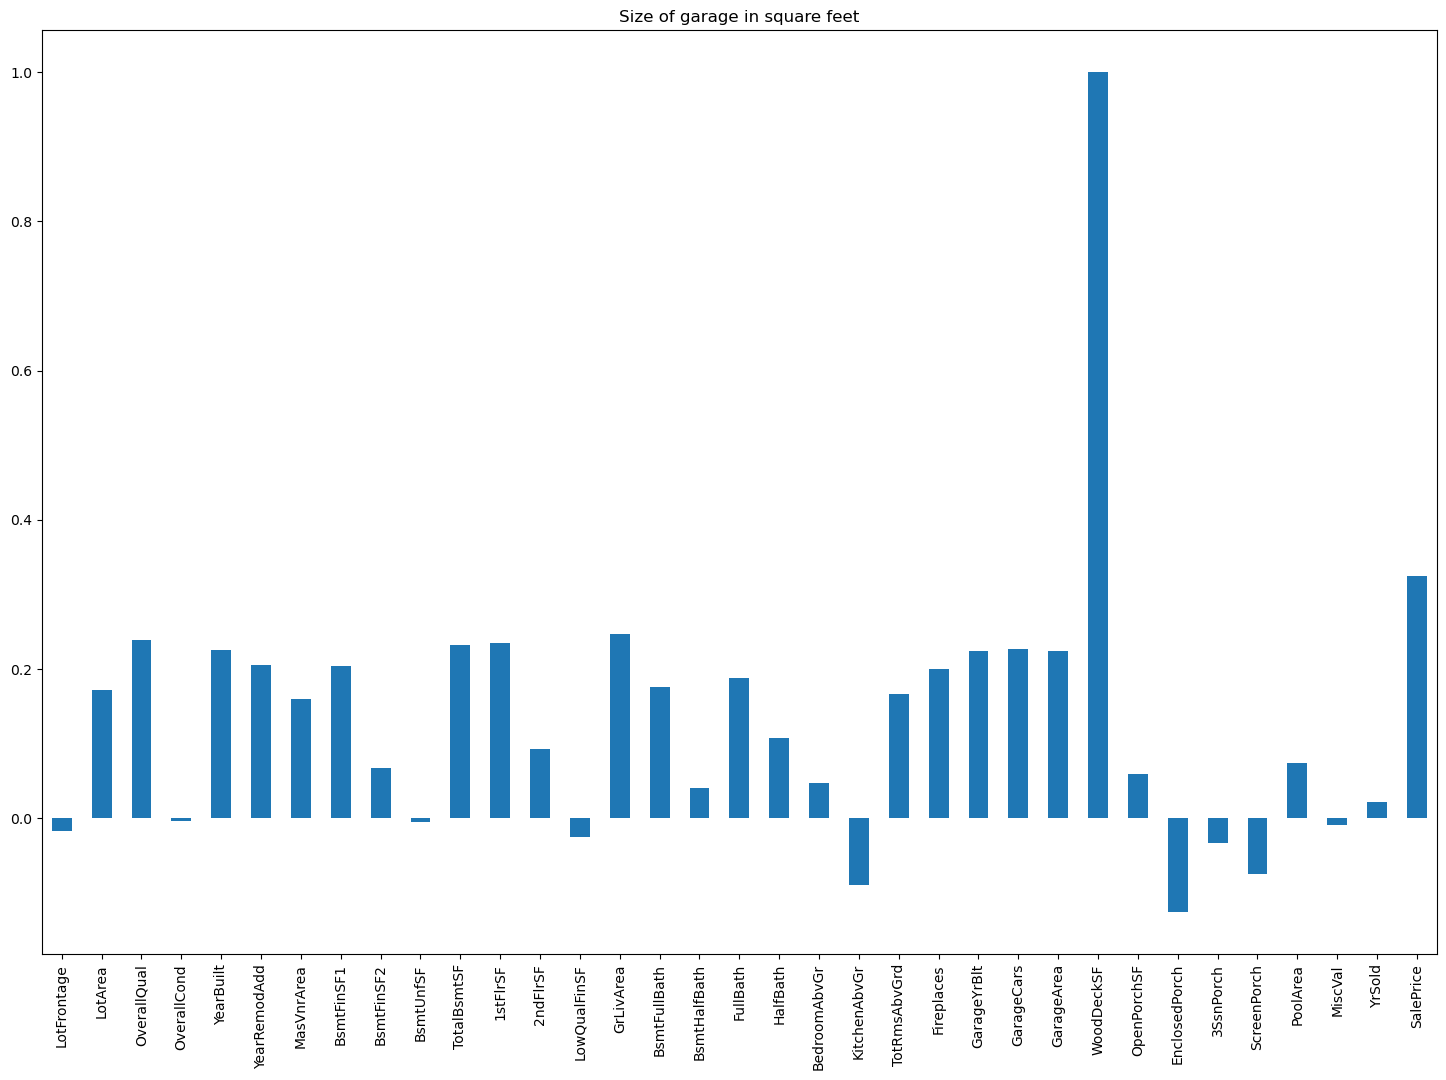

In [44]:
wdsf = pd.DataFrame(hdata.corr()['WoodDeckSF'])
plt.figure(figsize=(18,12))
wdsf['WoodDeckSF'].plot(kind='bar', title='Size of garage in square feet')
plt.show()

In [ ]:
## 'WoodDeckSF' has a strong correlation with 'SalePrice'

/var/folders/fd/d5mnlpm90t9d556_h08y7dkr0000gn/T/ipykernel_35720/1841563808.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wdsf = pd.DataFrame(hdata.corr()['WoodDeckSF'])


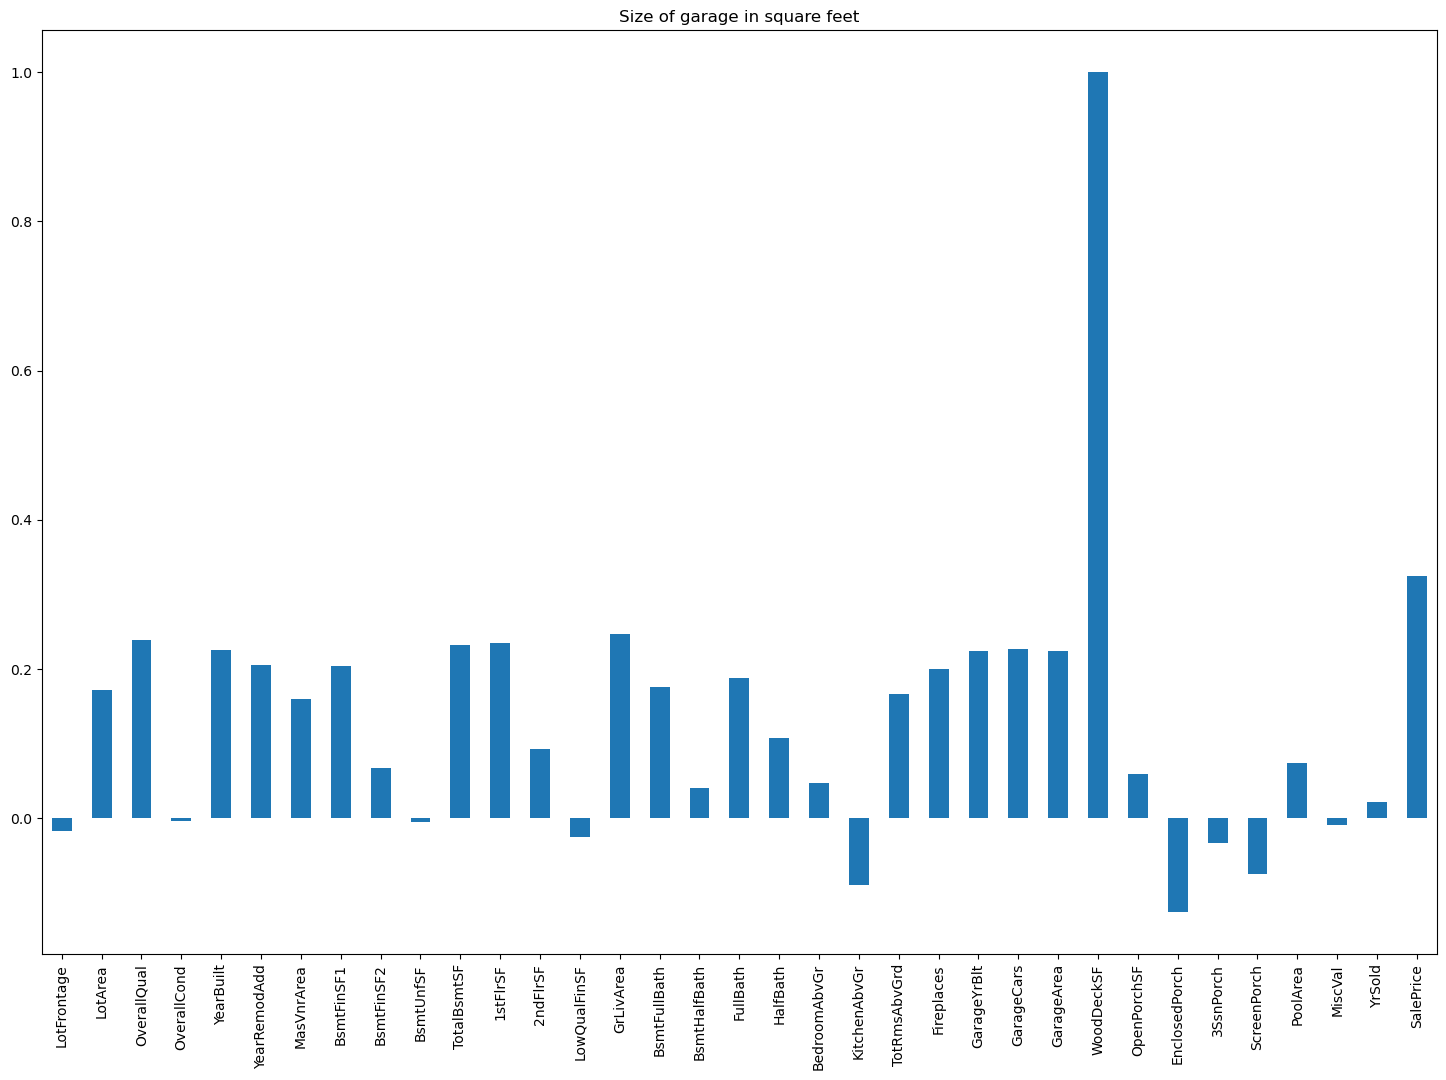

In [52]:
wdsf = pd.DataFrame(hdata.corr()['WoodDeckSF'])
plt.figure(figsize=(18,12))
wdsf['WoodDeckSF'].plot(kind='bar', title='Size of garage in square feet')
plt.show()

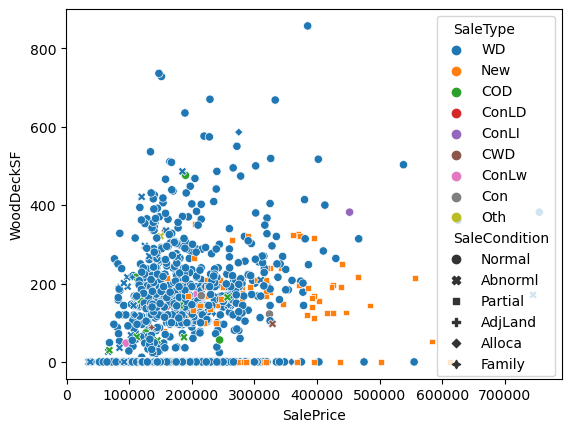

In [168]:
## 'WoodDeckSF' has a strong correlation with 'SalePrice'

sns.scatterplot(x='SalePrice', y='WoodDeckSF', data=hdata, hue='SaleType', style='SaleCondition')
plt.show()